In [702]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import datetime

import glob
import os

import yfinance as yf

from datetime import timezone, datetime

import requests

pd.set_option('mode.chained_assignment', None)

In [703]:
COMPANY_NAME = 'KRUK'

In [704]:
def getTicker(company_name):
    yfinance = "https://query2.finance.yahoo.com/v1/finance/search"
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
    params = {"q": company_name, "quotes_count": 1, "country": "Poland"}

    res = requests.get(url=yfinance, params=params, headers={'User-Agent': user_agent})
    data = res.json()

    company_code = data['quotes'][0]['symbol']
    return company_code

In [705]:
DATA_PATH = "data/data_out/"

In [706]:
df = pd.DataFrame()
for file_path in glob.glob(os.path.join(DATA_PATH, '*.csv')):
    df = pd.concat([df, pd.read_csv(file_path)], ignore_index=True)

df=df.drop(columns='Unnamed: 0')
df

,Date,SANTANDER,UNICREDIT,CEZ,PKNORLEN,PKOBP,DINOPL,PZU,ALLEGRO,SANPL,...,WIRTUALNA,GRUPRACUJ,NEUCA,STSHLDING,PLAYWAY,DOMDEV,ASSECOSEE,CIECH,BENEFIT,PCCROKITA
0,2013-04-15,NaN,inf,inf,inf,inf,NaN,inf,NaN,NaN,...,NaN,NaN,inf,NaN,NaN,inf,inf,inf,inf,NaN
1,2013-04-17,NaN,0.085608,0.018996,0.015920,0.011696,NaN,0.003612,NaN,NaN,...,NaN,NaN,0.021398,NaN,NaN,0.014162,0.053191,0.034976,0.024833,NaN
2,2013-04-18,NaN,0.063158,0.011111,0.014504,0.004969,NaN,0.009962,NaN,NaN,...,NaN,NaN,0.021661,NaN,NaN,0.015748,0.043165,0.020666,0.022901,NaN
3,2013-04-19,NaN,0.119250,0.014132,-2.000000,0.000300,NaN,-2.000000,NaN,NaN,...,NaN,NaN,0.018416,NaN,NaN,0.015436,0.028006,0.029714,0.047801,NaN
4,2013-04-22,NaN,0.097166,0.014132,0.024666,0.014521,NaN,0.009852,NaN,NaN,...,NaN,NaN,0.048604,NaN,NaN,0.015748,inf,0.011534,0.053232,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2017-07-19,0.074462,0.054772,0.010828,0.008518,0.010141,0.037574,0.003165,NaN,NaN,...,0.032598,NaN,0.014162,NaN,0.039333,0.013245,0.027239,0.005119,0.017024,0.008433
1063,2017-07-20,0.100244,0.054204,0.013163,0.006767,0.001668,0.038164,0.004913,NaN,NaN,...,0.027738,NaN,0.010297,NaN,0.016529,0.012978,0.006536,0.014342,0.018657,0.000538
1064,2017-07-21,0.105263,0.066920,0.008342,0.004094,0.003351,0.036944,0.004397,NaN,NaN,...,0.036405,NaN,0.030616,NaN,0.002950,0.038692,0.016529,0.016481,0.024952,0.004077
1065,2017-07-24,0.069965,0.106744,0.028294,0.002351,0.003907,0.048857,0.001984,NaN,NaN,...,0.045084,NaN,0.019611,NaN,0.046816,0.044016,0.083121,0.008957,0.021853,0.010056


In [707]:
df.columns

Index(['Date', 'SANTANDER', 'UNICREDIT', 'CEZ', 'PKNORLEN', 'PKOBP', 'DINOPL',
       'PZU', 'ALLEGRO', 'SANPL', 'KGHM', 'MOL', 'PEKAO', 'PEPCO', 'INGBSK',
       'LPP', 'PGE', 'KRKA', 'MBANK', 'CDPROJEKT', 'CYFRPLSAT', 'HANDLOWY',
       'ORANGEPL', 'BNPPL', 'IIAAV', 'BUDIMEX', 'JSW', 'KRUK', 'MILLENNIUM',
       'INTERCARS', 'ASSECOPOL', 'PEP', 'ALIOR', 'KETY', 'GRPAAZOTY', 'AMREST',
       'XTB', 'TAURONPE', 'GTC', 'ENEA', 'LIVECHAT', 'WIRTUALNA', 'GRUPRACUJ',
       'NEUCA', 'STSHLDING', 'PLAYWAY', 'DOMDEV', 'ASSECOSEE', 'CIECH',
       'BENEFIT', 'PCCROKITA'],
      dtype='object')

In [708]:
df = df[['Date', COMPANY_NAME]] 
df

,Date,KRUK
0,2013-04-15,inf
1,2013-04-17,0.016983
2,2013-04-18,0.016260
3,2013-04-19,0.008032
4,2013-04-22,0.030511
...,...,...
1062,2017-07-19,0.017981
1063,2017-07-20,0.024058
1064,2017-07-21,0.032305
1065,2017-07-24,0.003472


In [709]:
# msft = yf.Ticker("CDR.WA" if COMPANY_NAME == 'CDPROJEKT' else 'PKN.WA' if COMPANY_NAME == 'PKNORLEN' else None)
ticker_name = getTicker(COMPANY_NAME)
print(ticker_name)
yf_company = yf.Ticker(ticker_name)
# get stock info
hist = yf_company.history(period="max")
hist = pd.DataFrame(hist)
hist = hist.reset_index()
hist['Date'] = hist['Date'].apply(lambda x: pd.to_datetime(x, utc=False).replace(tzinfo=None))

df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x, utc=False).replace(tzinfo=None))
XY = df.set_index('Date').join(hist.set_index('Date'))
XY = XY.reset_index()
XY = XY.rename(columns={'Close':'P', 'Volume':'V'})
XY['(H-L)/P'] = XY['High'] - XY['Low'] / XY['P']
df = XY[['Date', COMPANY_NAME, 'P', 'V', '(H-L)/P']]
df

KRU.WA


,Date,KRUK,P,V,(H-L)/P
0,2013-04-15,inf,51.024296,11406,50.398766
1,2013-04-17,0.016983,50.884052,11061,50.149339
2,2013-04-18,0.016260,51.478031,11526,50.573187
3,2013-04-19,0.008032,51.156292,10986,50.563753
4,2013-04-22,0.030511,51.131538,1435,50.142694
...,...,...,...,...,...
1062,2017-07-19,0.017981,268.937897,61363,271.586494
1063,2017-07-20,0.024058,274.443695,101445,281.456647
1064,2017-07-21,0.032305,280.076599,68822,279.821093
1065,2017-07-24,0.003472,282.914215,63781,284.771593


In [710]:
def del_negative(x):
    if x == np.inf: return np.nan
    return x if x > 0 else np.nan

df[COMPANY_NAME] = df[COMPANY_NAME].apply(del_negative)
df['P'] = df['P'].apply(del_negative)
df['V'] = df['V'].apply(del_negative)
df['(H-L)/P'] = df['(H-L)/P'].apply(del_negative)
# df['CDPROJEKT'] = df['CDPROJEKT'].apply(del_negative)
# df['PKOBP'] = df['PKOBP'].apply(del_negative)

<Axes: >

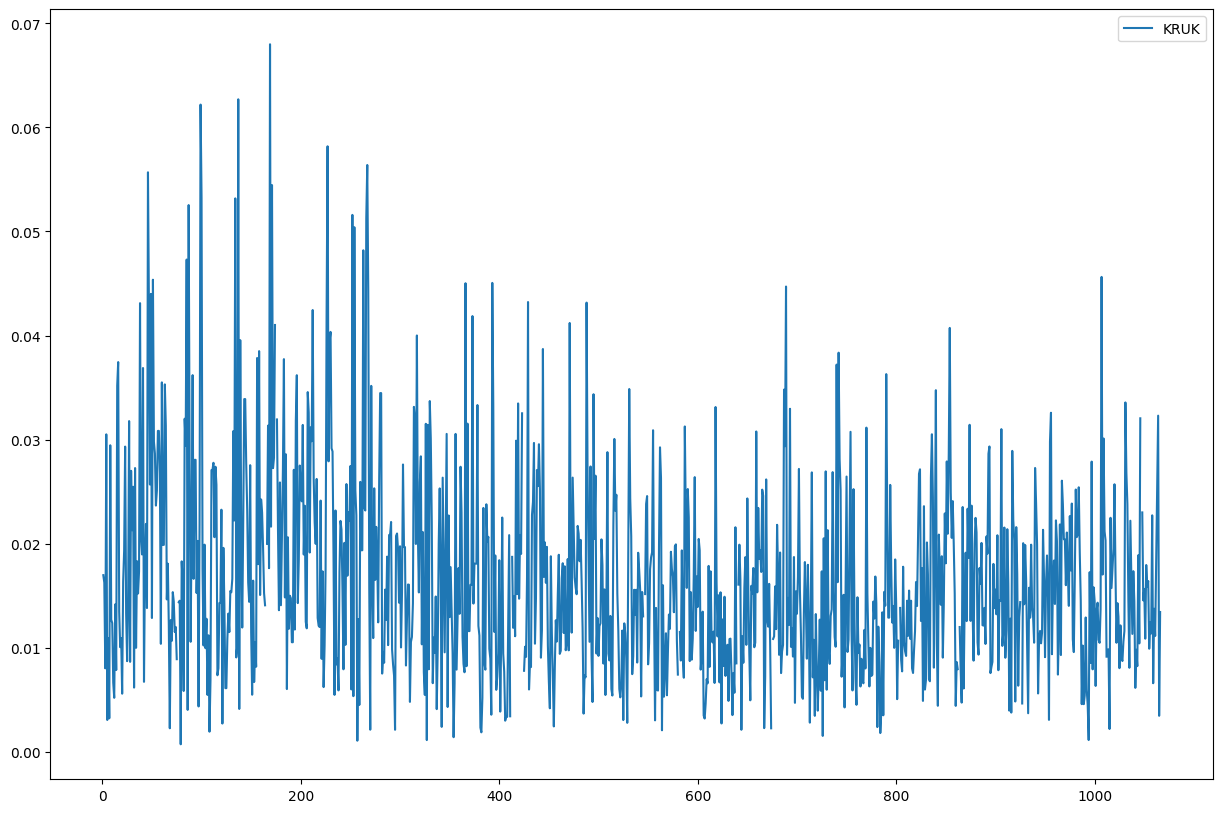

In [711]:
df.plot(use_index=True, y=COMPANY_NAME, figsize=(15,10))

In [712]:
df.isna().sum()


Date        0
KRUK       15
P           0
V          34
(H-L)/P     0
dtype: int64

In [713]:
df = df.dropna().reset_index(drop=True) #AD_HOCK -> TODO !
df

,Date,KRUK,P,V,(H-L)/P
0,2013-04-17,0.016983,50.884052,11061.0,50.149339
1,2013-04-18,0.016260,51.478031,11526.0,50.573187
2,2013-04-19,0.008032,51.156292,10986.0,50.563753
3,2013-04-22,0.030511,51.131538,1435.0,50.142694
4,2013-04-23,0.003070,51.148041,67195.0,50.398756
...,...,...,...,...,...
1013,2017-07-19,0.017981,268.937897,61363.0,271.586494
1014,2017-07-20,0.024058,274.443695,101445.0,281.456647
1015,2017-07-21,0.032305,280.076599,68822.0,279.821093
1016,2017-07-24,0.003472,282.914215,63781.0,284.771593


In [714]:
list(df[COMPANY_NAME].values)

[0.0169834209462192,
 0.016260162601626,
 0.0080321285140562,
 0.0305109371216401,
 0.0030697148396478,
 0.0109395109395109,
 0.0032310177705977,
 0.0294599018003272,
 0.0127015144113335,
 0.0123778501628664,
 0.0066585464880227,
 0.005200715098326,
 0.014179825974863,
 0.007870853746687,
 0.035195103289977,
 0.0374531835205992,
 0.0134730538922156,
 0.0100649113850195,
 0.0109418896939227,
 0.0055972897333921,
 0.0163568773234199,
 0.0193562907945083,
 0.0293343362166228,
 0.0133333333333334,
 0.008720930232558,
 0.0143488658598448,
 0.0317844710155896,
 0.0086554245634979,
 0.0270065240479441,
 0.0213014071367487,
 0.0254777070063694,
 0.0061823802163833,
 0.0272727272727274,
 0.0100038476337051,
 0.0183206106870227,
 0.015220700152207,
 0.0173388616660385,
 0.0431126739030728,
 0.0205401293267403,
 0.0189753320683111,
 0.0368846212467609,
 0.0067350375019133,
 0.0180590333105698,
 0.0219078046554084,
 0.0138256087981147,
 0.0556844547563805,
 0.0424528301886792,
 0.0256898192197906,

In [715]:
# df['CDPROJEKT_ln_diff'] = np.log(df['CDPROJEKT'].shift(-1)) - np.log(df['CDPROJEKT'])
df[COMPANY_NAME+'_ln_diff'] = np.log(df[COMPANY_NAME].shift(-1)) - np.log(df[COMPANY_NAME])
df['P'+'_ln_diff'] = np.log(df['P'].shift(-1)) - np.log(df['P'])
df['V'+'_ln_diff'] = np.log(df['V'].shift(-1)) - np.log(df['V'])
df['(H-L)/P'+'_ln_diff'] = np.log(df['(H-L)/P'].shift(-1)) - np.log(df['(H-L)/P'])
# df['PKOBP_ln_diff'] = np.log(df['PKOBP'].shift(-1)) - np.log(df['PKOBP'])
df


,Date,KRUK,P,V,(H-L)/P,KRUK_ln_diff,P_ln_diff,V_ln_diff,(H-L)/P_ln_diff
0,2013-04-17,0.016983,50.884052,11061.0,50.149339,-0.043520,0.011606,0.041180,0.008416
1,2013-04-18,0.016260,51.478031,11526.0,50.573187,-0.705269,-0.006270,-0.047984,-0.000187
2,2013-04-19,0.008032,51.156292,10986.0,50.563753,1.334636,-0.000484,-2.035457,-0.008362
3,2013-04-22,0.030511,51.131538,1435.0,50.142694,-2.296501,0.000323,3.846434,0.005094
4,2013-04-23,0.003070,51.148041,67195.0,50.398756,1.270796,0.000000,-2.427743,0.003268
...,...,...,...,...,...,...,...,...,...
1013,2017-07-19,0.017981,268.937897,61363.0,271.586494,0.291168,0.020266,0.502710,0.035698
1014,2017-07-20,0.024058,274.443695,101445.0,281.456647,0.294733,0.020317,-0.387993,-0.005828
1015,2017-07-21,0.032305,280.076599,68822.0,279.821093,-2.230502,0.010081,-0.076068,0.017537
1016,2017-07-24,0.003472,282.914215,63781.0,284.771593,1.353729,-0.004802,-0.319450,0.007635


In [716]:
print(df.isna().sum())
df = df.dropna().reset_index(drop=True) #AD_HOCK -> TODO !
df

Date               0
KRUK               0
P                  0
V                  0
(H-L)/P            0
KRUK_ln_diff       1
P_ln_diff          1
V_ln_diff          1
(H-L)/P_ln_diff    1
dtype: int64


,Date,KRUK,P,V,(H-L)/P,KRUK_ln_diff,P_ln_diff,V_ln_diff,(H-L)/P_ln_diff
0,2013-04-17,0.016983,50.884052,11061.0,50.149339,-0.043520,0.011606,0.041180,0.008416
1,2013-04-18,0.016260,51.478031,11526.0,50.573187,-0.705269,-0.006270,-0.047984,-0.000187
2,2013-04-19,0.008032,51.156292,10986.0,50.563753,1.334636,-0.000484,-2.035457,-0.008362
3,2013-04-22,0.030511,51.131538,1435.0,50.142694,-2.296501,0.000323,3.846434,0.005094
4,2013-04-23,0.003070,51.148041,67195.0,50.398756,1.270796,0.000000,-2.427743,0.003268
...,...,...,...,...,...,...,...,...,...
1012,2017-07-18,0.011141,270.632019,43038.0,269.655493,0.478672,-0.006280,0.354724,0.007135
1013,2017-07-19,0.017981,268.937897,61363.0,271.586494,0.291168,0.020266,0.502710,0.035698
1014,2017-07-20,0.024058,274.443695,101445.0,281.456647,0.294733,0.020317,-0.387993,-0.005828
1015,2017-07-21,0.032305,280.076599,68822.0,279.821093,-2.230502,0.010081,-0.076068,0.017537


<Axes: >

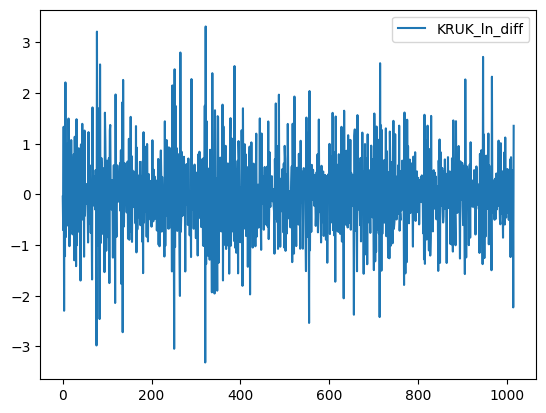

In [717]:
df.plot(use_index=True, y=COMPANY_NAME+'_ln_diff') #, figsize=(15,10)

In [718]:
variables_names = [COMPANY_NAME+'_ln_diff',	'P_ln_diff',	'V_ln_diff',	'(H-L)/P_ln_diff']

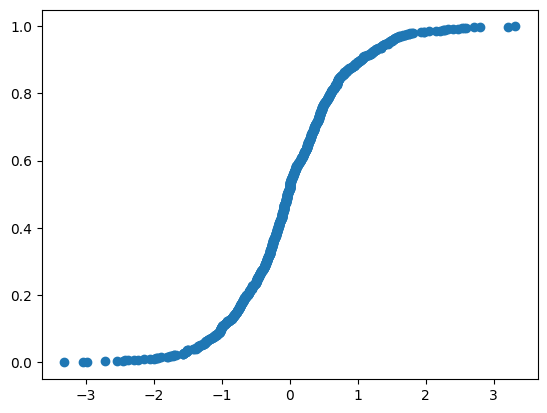

In [719]:
syt_tab = [df[[col_name]].sort_values(col_name).reset_index(drop=True) for col_name in variables_names]
# syt2 = df[['P_ln_diff']].sort_values('P_ln_diff').reset_index(drop=True)
# syt3 = df[['V_ln_diff']].sort_values('V_ln_diff').reset_index(drop=True)
# syt4 = df[['(H-L)/P_ln_diff']].sort_values('(H-L)/P_ln_diff').reset_index(drop=True)
plt.scatter(x=syt_tab[0].iloc[:, 0].values, y=np.array((syt_tab[0].index-0.5)/len(syt_tab[0].index)))
plt.show()

In [720]:
mu_tab = [df[col_name].median() for col_name in variables_names]
b_tab = [(np.abs(df[col_name] - mu_tab[it])).mean() for it, col_name in enumerate(variables_names)]
for v,m,b in zip(variables_names,mu_tab,b_tab):
    print(v,'- mu=',m,'b=',b)

KRUK_ln_diff - mu= -0.03455427682625434 b= 0.6242557571556148
P_ln_diff - mu= 0.0005435091224841315 b= 0.012547351099114638
V_ln_diff - mu= 0.01643314810498353 b= 0.9449575320721305
(H-L)/P_ln_diff - mu= -6.83620856136713e-05 b= 0.011496543258904217


In [721]:
def cdf_L(y,mu,b):
    return np.exp((y-mu)/b)/2 if y<mu else 1-np.exp(-(y-mu)/b)/2

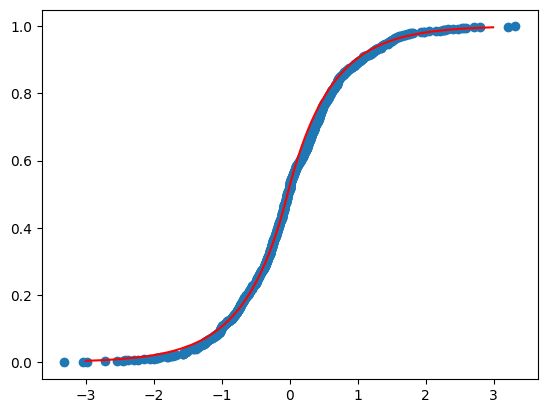

In [722]:
y_val = [cdf_L(x,mu_tab[0],b_tab[0]) for x in np.arange(-3,3, 0.01)]
x_val = [x for x in np.arange(-3,3, 0.01)]
plt.plot(x_val,y_val, 'r')
plt.scatter(x=syt_tab[0].iloc[:, 0].values, y=np.array((syt_tab[0].index-0.5)/len(syt_tab[0].index)))

In [723]:
xt = [df[v].apply(cdf_L,args=(mu_tab[i],b_tab[i])) for i,v in enumerate(variables_names)]

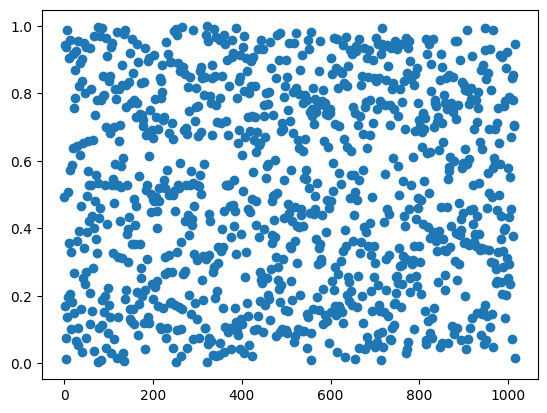

In [724]:
plt.scatter(xt[0].index,xt[0])

<Axes: >

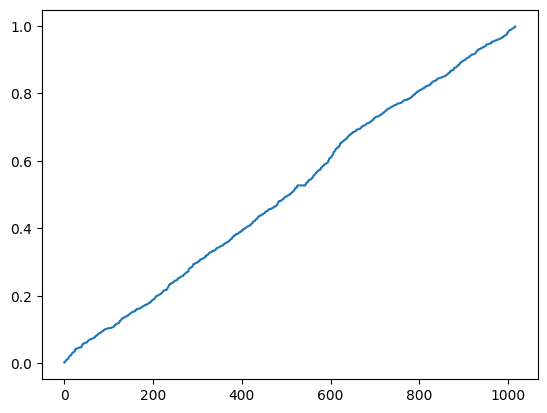

In [725]:
xt[0].sort_values().reset_index(drop=True).plot()

In [726]:
l_poln = [
    lambda x: 1,
    lambda x: np.sqrt(3)*(-1 + 2*x),
    lambda x: np.sqrt(5)*(1 - 6*x + 6*x**2),
    lambda x: np.sqrt(7)*(-1 + 12*x - 30*x**2 + 20*x**3),
    lambda x: 3 *(1-20*x+90*x**2-140*x**3+70*x**4),
]

In [727]:
cl = 3;
# d = 1 + cl #(* dimension = 1 + context length *) # for nor X_Y
d = 3 #(* dimension = 1 + context length *)
m = len(l_poln)-1 #(* maximal degree of polynomial *)

coefn = np.power(m+1,d)
print(coefn, "coefficients")

125 coefficients


In [728]:
# ct = pd.DataFrame(np.transpose([xt.shift(i).values for i in range(1,d+1)]))
ct = pd.DataFrame(np.transpose([xt[i] for i in range(d+1)]))
ct = ct[d:]
ct.reset_index(drop=True)

,0,1,2,3
0,0.013346,0.491278,0.991316,0.680870
1,0.938221,0.478804,0.037640,0.625959
2,0.074911,0.134490,0.138518,0.246486
3,0.986283,0.810265,0.370120,0.543426
4,0.137313,0.250603,0.739737,0.345214
...,...,...,...,...
1009,0.780255,0.290273,0.650462,0.732800
1010,0.703268,0.896166,0.701131,0.977723
1011,0.704957,0.896590,0.325911,0.302966
1012,0.014834,0.766187,0.453375,0.891879


In [729]:
values_2 = []
for pol_f in l_poln:
    c_tab = []
    for idx, col in ct.iteritems():
        c_tab.append([pol_f(x) for x in col])
    values_2.append(c_tab)

ctp = np.array(values_2)
print(ctp.shape)

(5, 4, 1014)


C:\Users\lukas\AppData\Local\Temp\ipykernel_19976\1397416346.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, col in ct.iteritems():


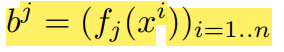

In [730]:
B_j_Y = [[row for row in ctp[fun][0]] for fun in range(len(l_poln))]
B_j_Y = np.array(B_j_Y)
print(B_j_Y)

[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [-1.68582064  1.51804347 -1.47255163 ...  0.70999323 -1.68066531
   1.54466692]
 [ 2.05940879  1.45842612  1.30632019 ... -0.5544438   2.04000495
   1.54959052]
 [-2.23605545  0.97479799 -0.69056901 ... -1.17121349 -2.19208782
   1.15222307]
 [ 2.24636596  0.22779454 -0.14945573 ... -0.39476608  2.16802697
   0.47977266]]


In [731]:
# jt_tab = [[int(x)+0 for x in np.base_repr(i, base=m+1).zfill(d)] for i in range(coefn)] # for not X_Y
jt_tab = [[int(x) for x in np.base_repr(i, base=m+1).zfill(d)] for i in range(coefn)]

print(jt_tab)
len(jt_tab)

[[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4], [0, 1, 0], [0, 1, 1], [0, 1, 2], [0, 1, 3], [0, 1, 4], [0, 2, 0], [0, 2, 1], [0, 2, 2], [0, 2, 3], [0, 2, 4], [0, 3, 0], [0, 3, 1], [0, 3, 2], [0, 3, 3], [0, 3, 4], [0, 4, 0], [0, 4, 1], [0, 4, 2], [0, 4, 3], [0, 4, 4], [1, 0, 0], [1, 0, 1], [1, 0, 2], [1, 0, 3], [1, 0, 4], [1, 1, 0], [1, 1, 1], [1, 1, 2], [1, 1, 3], [1, 1, 4], [1, 2, 0], [1, 2, 1], [1, 2, 2], [1, 2, 3], [1, 2, 4], [1, 3, 0], [1, 3, 1], [1, 3, 2], [1, 3, 3], [1, 3, 4], [1, 4, 0], [1, 4, 1], [1, 4, 2], [1, 4, 3], [1, 4, 4], [2, 0, 0], [2, 0, 1], [2, 0, 2], [2, 0, 3], [2, 0, 4], [2, 1, 0], [2, 1, 1], [2, 1, 2], [2, 1, 3], [2, 1, 4], [2, 2, 0], [2, 2, 1], [2, 2, 2], [2, 2, 3], [2, 2, 4], [2, 3, 0], [2, 3, 1], [2, 3, 2], [2, 3, 3], [2, 3, 4], [2, 4, 0], [2, 4, 1], [2, 4, 2], [2, 4, 3], [2, 4, 4], [3, 0, 0], [3, 0, 1], [3, 0, 2], [3, 0, 3], [3, 0, 4], [3, 1, 0], [3, 1, 1], [3, 1, 2], [3, 1, 3], [3, 1, 4], [3, 2, 0], [3, 2, 1], [3, 2, 2], [3, 2, 3], [3, 2, 4], [3, 3, 0]

125

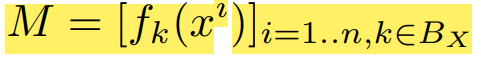

In [732]:
coef = []
for row in range(len(ctp[0][0])):
    ans = []
    for jt in jt_tab:
        ans.append(np.product([ctp[jt[i]][i+1][row] for i in range(len(jt))]))
    coef.append(ans)
print(len(coef))
coef = np.array(coef)
coef

1014


array([[ 1.00000000e+00,  6.26550631e-01, -6.79132201e-01, ...,
        -1.90351104e+00, -3.14624492e+00, -3.43015914e-01],
       [ 1.00000000e+00,  4.36335315e-01, -9.05173167e-01, ...,
        -1.10222471e+00, -1.08864691e+00,  5.64894060e-01],
       [ 1.00000000e+00, -8.78199387e-01, -2.55767982e-01, ...,
        -3.40615448e-01,  1.53156338e+00, -1.19817404e+00],
       ...,
       [ 1.00000000e+00, -6.82545409e-01, -5.97177467e-01, ...,
        -2.07820851e-02,  4.03388142e-02, -1.06315274e-02],
       [ 1.00000000e+00,  1.35750986e+00,  9.42315959e-01, ...,
        -9.77764614e-01, -7.68009449e-02,  8.64414074e-01],
       [ 1.00000000e+00,  8.45793642e-01, -3.18229497e-01, ...,
         2.75657754e-03,  1.01154266e-02,  7.02787671e-03]])

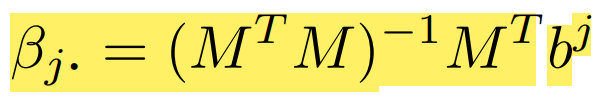

In [733]:
B_j_tab = [np.matmul(np.matmul(np.linalg.inv(np.matmul(coef.T,coef)),coef.T),B_j_Y[y_j]) for y_j in range(len(B_j_Y))]
B_j_tab

[array([ 1.00000000e+00, -1.31075706e-14,  1.34714288e-14, -1.82857202e-14,
        -3.79123816e-15,  2.84603070e-15, -8.89913143e-15,  2.19876201e-15,
        -1.25576632e-14, -3.33088591e-15, -6.00561267e-15, -2.15452656e-15,
        -6.43408937e-15,  2.22044605e-15, -6.96231267e-15, -1.02348685e-16,
         1.19817350e-14, -3.55228000e-15,  1.15142271e-14,  5.49018296e-15,
         1.74599918e-15,  7.77004329e-15,  7.71973631e-15,  1.48926010e-15,
         1.69309011e-15,  1.42559575e-14, -1.45163829e-14,  3.12835695e-14,
         8.25381430e-15,  1.48873969e-14, -4.42831535e-15, -1.87744785e-14,
         1.21664831e-14, -4.39578929e-15, -3.95300112e-15,  2.94556046e-15,
         8.29241190e-15,  1.70870262e-15,  8.48800197e-15, -4.64862523e-15,
        -9.66609605e-15, -5.81132364e-17, -1.45916265e-14,  1.07010754e-15,
        -4.42636379e-15, -5.08284820e-15, -8.28937613e-15, -9.59302082e-16,
        -2.82196141e-15, -1.63302531e-15,  8.33100949e-15, -1.58263160e-14,
         4.2

In [734]:
import seaborn as sns

<Axes: >

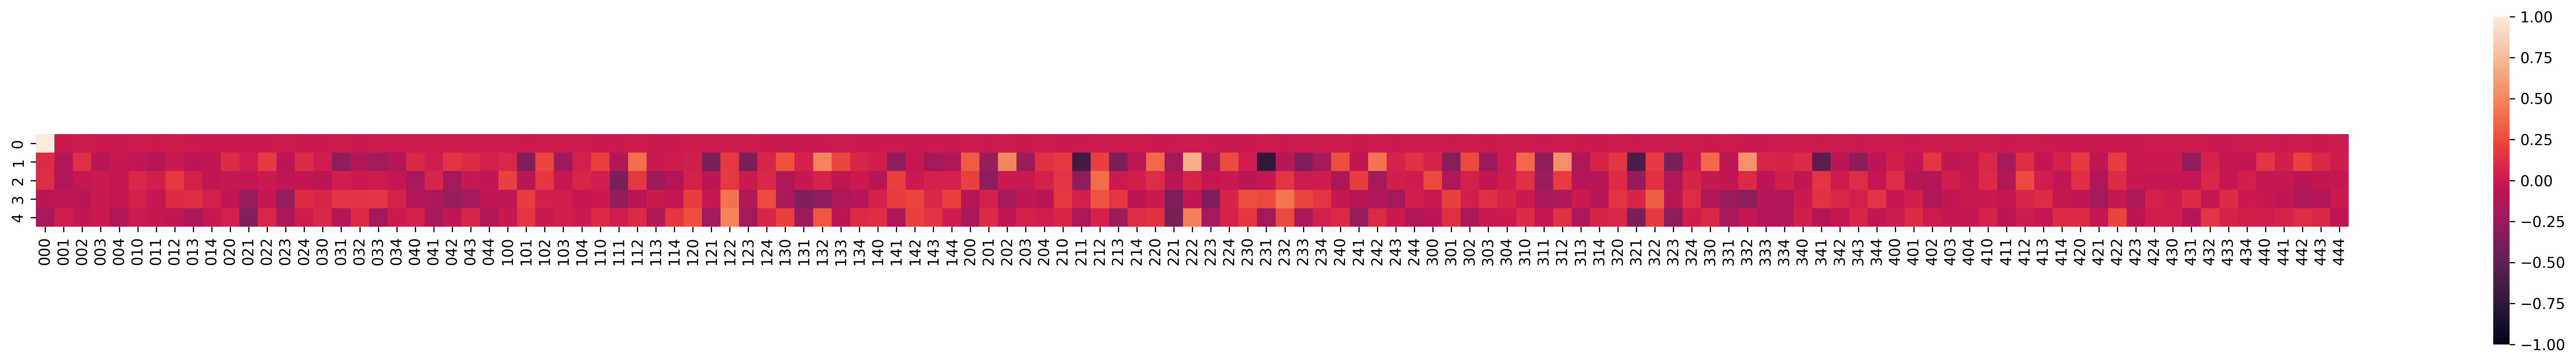

In [735]:
coef_heatmap = pd.DataFrame(B_j_tab, columns=[''.join(list(map(str,el))) for el in jt_tab])
plt.figure(figsize=(35,4), dpi=300)
sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(coef_heatmap, vmin=-1, vmax=1, square=True, ) #, square=True

*PZU*
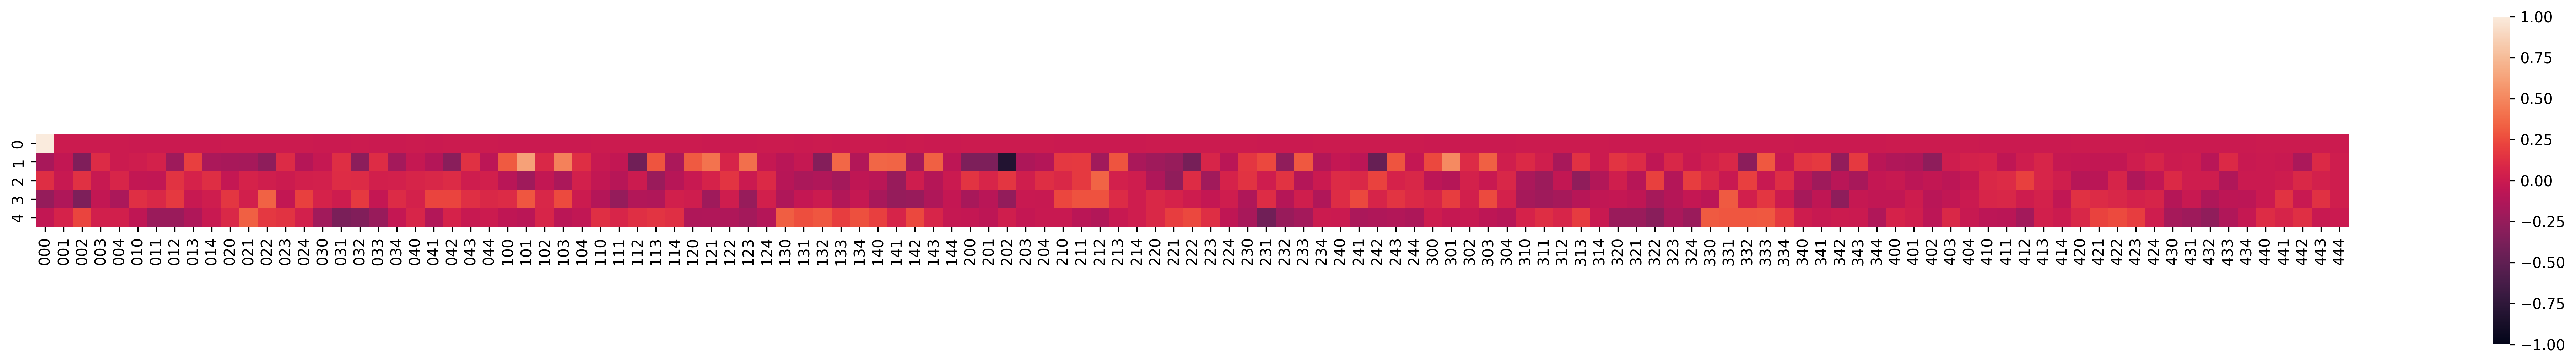

*CD PROJEKT*
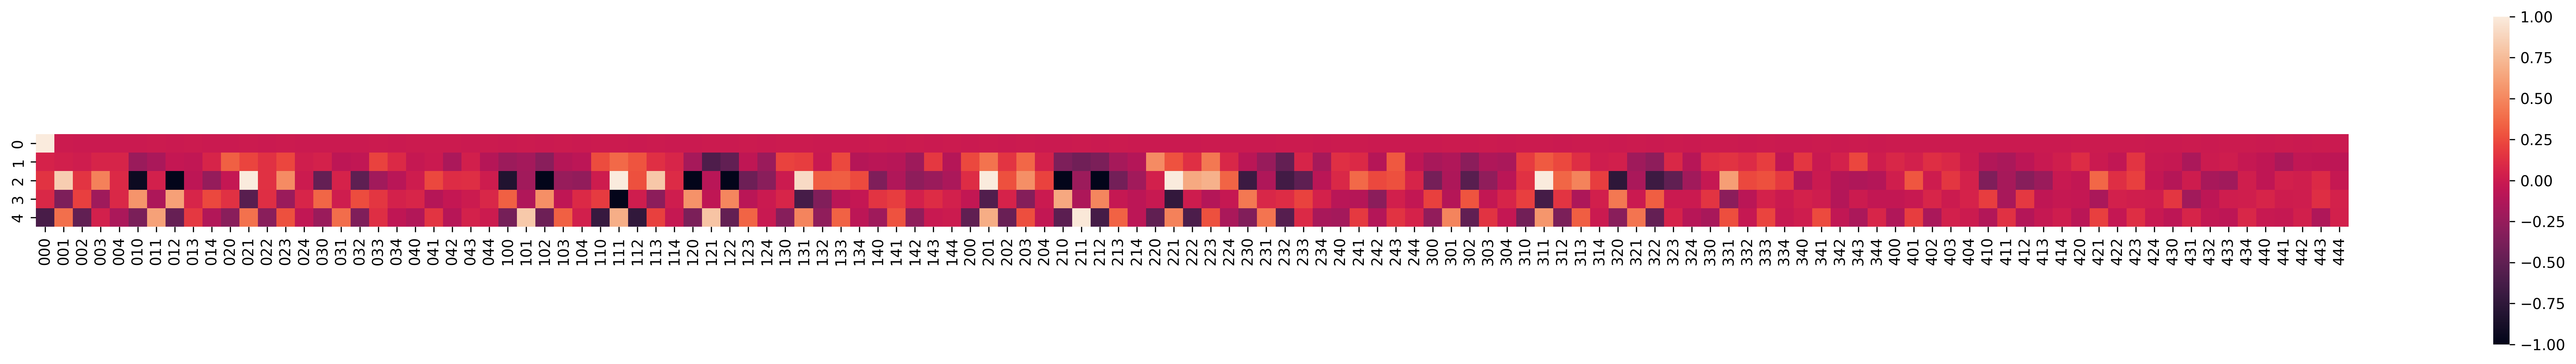

*PKN ORLEN*
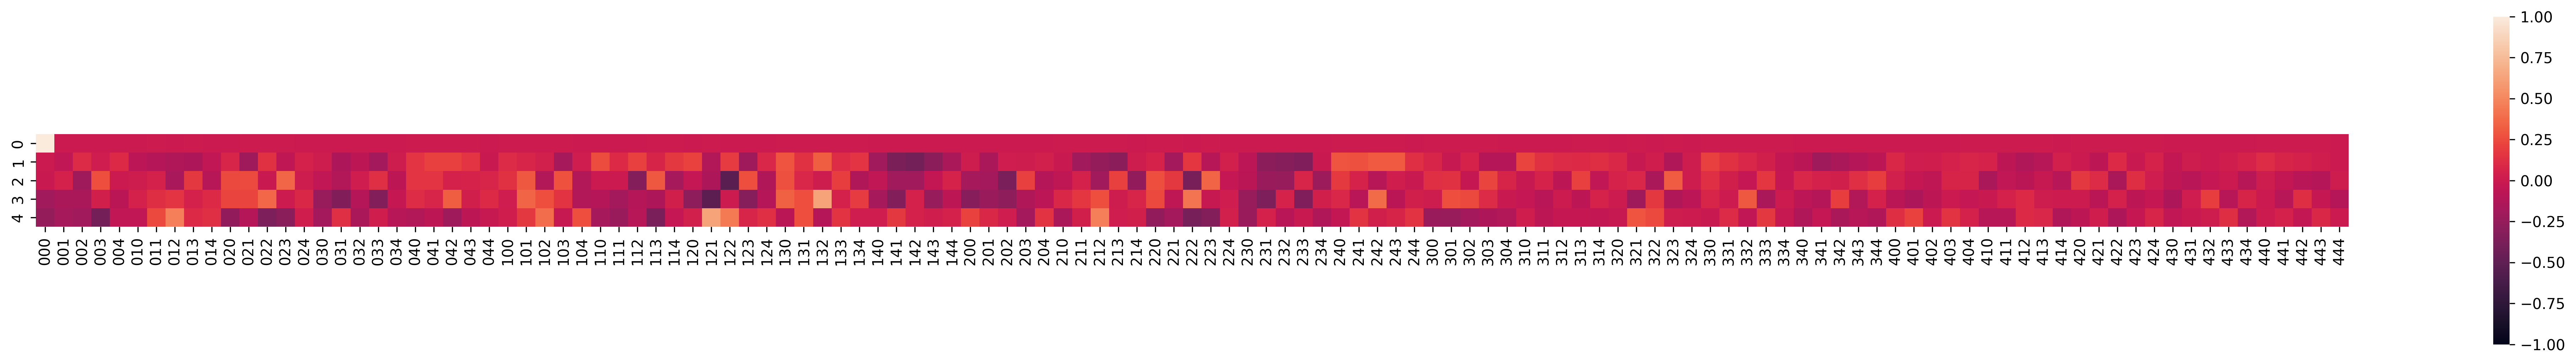

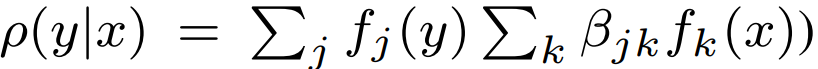

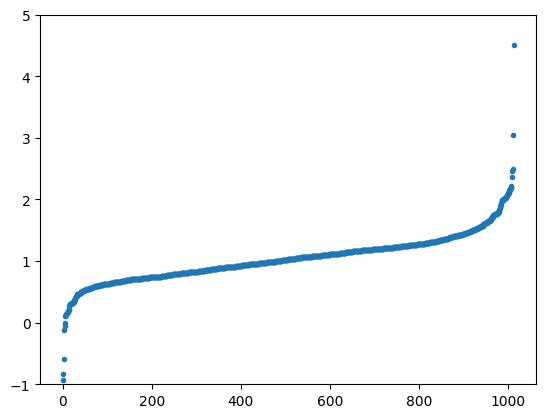

In [736]:
p_yx = []
for i,c in ct.iterrows():
    sum_j = 0
    for j in range(len(l_poln)):
        sum_k = 0
        for k in range(len(l_poln)):
            sum_k += B_j_tab[j][k] * np.product([l_poln[k](c[d]) for d in range(1,4)])
        sum_j += l_poln[j](c[0]) * sum_k
    p_yx.append(sum_j)

p_yx = np.sort(p_yx)
p_yx = pd.DataFrame(p_yx)
# plt.figure(figsize=(10, 7))
plt.ylim(-1,5)
plt.scatter(y=p_yx[0].values ,x=p_yx.index.values, marker=".")
plt.show()

In [737]:
# # for old
pt = np.zeros(shape=(len(l_poln),len(ct)))
for j in range(len(l_poln)):
    for it, jt in enumerate(jt_tab):
        pt[j] += B_j_tab[j][it]*np.product([ctp[jt[c], c+1] for c in range(d)], axis=0)
pt

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-0.11849701,  0.38522432,  0.1711968 , ...,  0.88528702,
        -0.01997888,  0.15591747],
       [ 0.55735667, -0.09157448,  0.16897772, ...,  0.14997802,
        -0.23108559,  0.15007869],
       [-0.27527015,  0.01035735,  0.23589364, ...,  0.15294957,
         0.05229244, -0.21228177],
       [ 0.21275199,  0.3663512 , -0.18756841, ...,  0.01305441,
        -0.16839181,  0.33212828]])

In [738]:
for i in range(len(l_poln)-1, -1, -1):
    pt[i] /= pt[0]

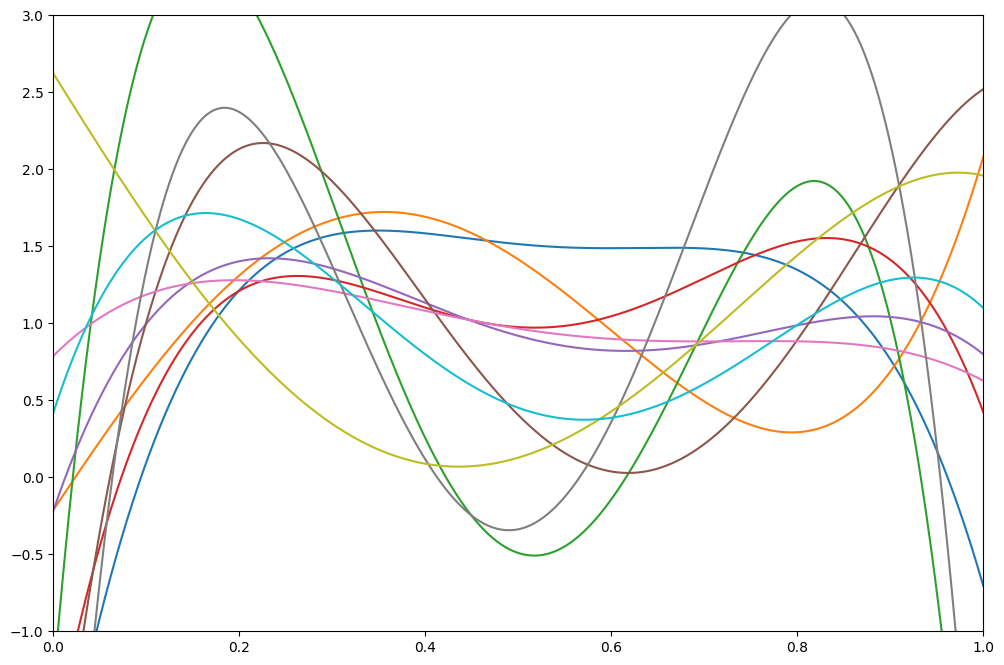

In [739]:
import random as rand

plst = [rand.randint(1,len(ct)-1) for _ in range(10)]
# plst = [i for i in range(1, len(ct))]
# plst = np.array([317, 361, 76, 47, 72, 222, 610, 482, 392, 614]) - 1
plt.figure(figsize=(12, 8))
plt.xlim(0,1)
plt.ylim(-1,3)
x_range = np.arange(0,1,0.0001)
for i in plst:
    
    y_vals = [np.sum([pt[j][i] * l_poln[j](x) for j in range(len(l_poln))]) for x in np.arange(0,1,0.0001)]
    plt.plot(list(x_range),y_vals, alpha=1)
    # plt.scatter(ct[0][i], rho[i])
    # print(y_true, x_true)
    # print(np.trapz(y_vals, x=x_range))

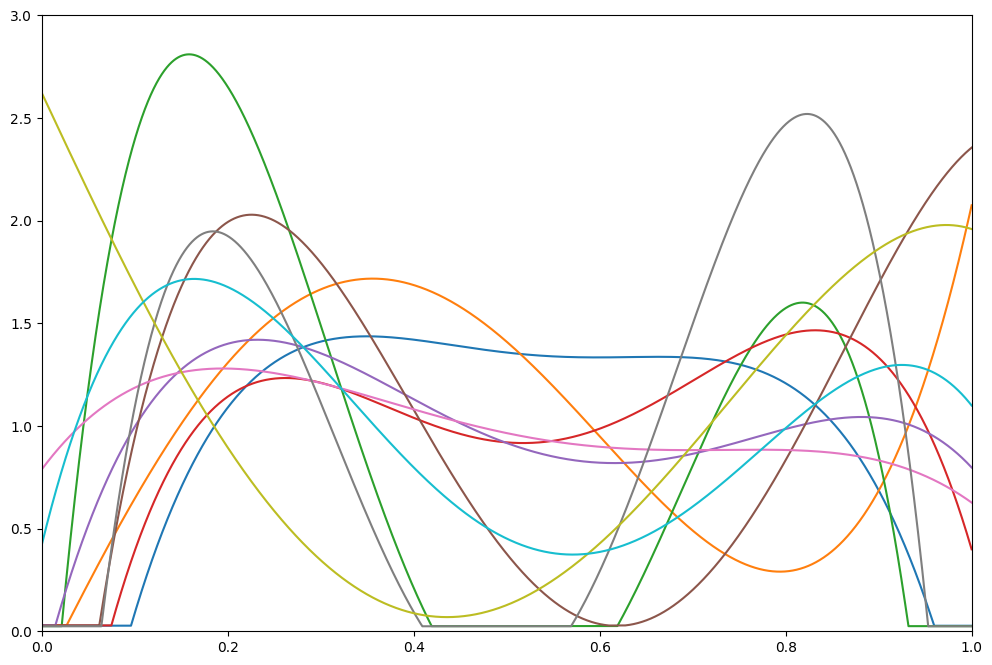

In [740]:
plt.figure(figsize=(12, 8))
plt.xlim(0,1)
plt.ylim(0,3)
treshold = 0.03
x_range = np.arange(0,1,0.0001)
for i in plst:
    y_vals = np.array([np.sum([pt[j][i] * l_poln[j](x) for j in range(len(l_poln))]) for x in x_range])
    y_vals = np.where(y_vals<treshold, 0.03, y_vals) 
    y_vals = y_vals / np.trapz(y_vals, x=x_range) # normalize
    plt.plot(list(x_range),y_vals)
    
    # print(np.trapz(y_vals, x=x_range))